In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/'

In [5]:
import zipfile

import os

from PIL import Image, ImageEnhance

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [6]:
survey_train = pd.read_csv(path+"Surveydata_train_(1).csv")
survey_test = pd.read_csv(path+"Surveydata_test_(1).csv")
travel_train = pd.read_csv(path+"Traveldata_train_(1).csv")
travel_test = pd.read_csv(path+"Traveldata_test_(1).csv")

print(survey_train.shape)
print(survey_test.shape)
print(travel_train.shape)
print(travel_test.shape)

(94379, 17)
(35602, 16)
(94379, 9)
(35602, 9)


In [7]:
train_data = survey_train.join(travel_train.set_index('ID'), on='ID')
test_data = survey_test.join(travel_test.set_index('ID'), on='ID')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [9]:
train_data.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [10]:
train_data.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [11]:
test_data.isnull().sum()

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_Location        35590 non-null  object 
 6   Onboard_Wifi_Service     35590 non-null  object 
 7   Onboard_Entertainment    35594 non-null  object 
 8   Online_Support           35576 non-null  object 
 9   Ease_of_Online_Booking   35584 non-null  object 
 10  Onboard_Service          32730 non-null  object 
 11  Legroom                  35577 non-null  object 
 12  Baggage_Handling         35562 non-null  object 
 13  CheckIn_Service          35580 non-null  object 
 14  Cleanliness           

In [13]:
print(train_data)

             ID  Overall_Experience       Seat_Comfort Seat_Class  \
0      98800001                   0  Needs Improvement  Green Car   
1      98800002                   0               Poor   Ordinary   
2      98800003                   1  Needs Improvement  Green Car   
3      98800004                   0         Acceptable   Ordinary   
4      98800005                   1         Acceptable   Ordinary   
...         ...                 ...                ...        ...   
94374  98894375                   0               Poor   Ordinary   
94375  98894376                   1               Good   Ordinary   
94376  98894377                   1  Needs Improvement  Green Car   
94377  98894378                   0  Needs Improvement   Ordinary   
94378  98894379                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
0                   Excellent          Excellent    Very Convenient   
1                   Excellent

In [14]:
print('Number of unique USERS in Raw data = ', train_data['ID'].nunique())

Number of unique USERS in Raw data =  94379


In [15]:
copy_train_data = train_data.copy(deep = True)
copy_test_data = test_data.copy(deep = True)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
copy_train_data["Overall_Experience"] = pd.Categorical(copy_train_data["Overall_Experience"])

In [18]:
for i in copy_train_data:
  if(copy_train_data[i].dtype == object):
    copy_train_data[i] = pd.Categorical(copy_train_data[i])
    copy_test_data[i] = pd.Categorical(copy_test_data[i])

In [19]:
for i in copy_train_data:
  if(copy_train_data[i].dtype == 'category'):
    #print(copy_train_data[i].mode()[0])
    copy_train_data[i] = copy_train_data[i].fillna(copy_train_data[i].mode()[0])
  else:
    copy_train_data[i] = copy_train_data[i].fillna(copy_train_data[i].median())
  
for i in copy_test_data:
  if(copy_test_data[i].dtype == 'category'):
    #print(copy_train_data[i].mode()[0])
    copy_test_data[i] = copy_test_data[i].fillna(copy_test_data[i].mode()[0])
  else:
    copy_test_data[i] = copy_test_data[i].fillna(copy_test_data[i].median())

In [20]:
copy_train_data.isnull().sum()

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [21]:
copy_test_data.isnull().sum()

ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [22]:
the_categories = []
for i in copy_train_data:
  if(copy_train_data[i].dtype == 'category'):
    the_categories.append(copy_train_data[i].cat.categories.tolist())
    print(str(i) + " : length - " + str(len(copy_train_data[i].cat.categories.tolist())))
 

Overall_Experience : length - 2
Seat_Comfort : length - 6
Seat_Class : length - 2
Arrival_Time_Convenient : length - 6
Catering : length - 6
Platform_Location : length - 6
Onboard_Wifi_Service : length - 6
Onboard_Entertainment : length - 6
Online_Support : length - 6
Ease_of_Online_Booking : length - 6
Onboard_Service : length - 6
Legroom : length - 6
Baggage_Handling : length - 5
CheckIn_Service : length - 6
Cleanliness : length - 6
Online_Boarding : length - 6
Gender : length - 2
Customer_Type : length - 2
Type_Travel : length - 2
Travel_Class : length - 2


In [23]:
print(the_categories)

[[0, 1], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Green Car', 'Ordinary'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Convenient', 'Inconvenient', 'Manageable', 'Needs Improvement', 'Very Convenient', 'Very Inconvenient'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Good', 'Needs Improvement', 'Poor'], ['Acceptable', 'Excellent', 'Extrem

In [24]:
for i in the_categories:
  if(len(i) == 6):
    print(i)

print('-------')

for i in the_categories:
  if(len(i) == 5):
    print(i)

print('-------')

for i in the_categories:
  if(len(i) == 2):
    print(i)

['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Convenient', 'Inconvenient', 'Manageable', 'Needs Improvement', 'Very Convenient', 'Very Inconvenient']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Imp

In [25]:
mapping_6po1 = {'Needs Improvement':0,
           'Extremely Poor':1,
           'Poor':2,
           'Acceptable':3,
           'Good':4,
           'Excellent':5}

mapping_6po2 = {'Needs Improvement':0,
           'Very Inconvenient':1,
           'Inconvenient':2,
           'Manageable':3,
           'Convenient':4,
           'Very Convenient':5}

# assumption that disloyal customer will give a bad exp review or have bad exp
mapping_2po1 = {'Disloyal Customer':0,
                'Loyal Customer':1}

In [26]:
copy2_training_data = copy_train_data.copy(deep = True)

In [27]:
#copy2_training_data.replace({{'Needs Improvement':mapping_6po1,'Extremely Poor':mapping_6po1,'Poor':mapping_6po1,'Acceptable':mapping_6po1,'Good':mapping_6po1,'Excellent':mapping_6po1},{'Very Inconvenient':mapping_6po2,'Inconvenient':mapping_6po2,'Manageable':mapping_6po2,'Convenient':4,'Very Convenient':mapping_6po2},{'Disloyal Customer':mapping_2po1,'Loyal Customer':mapping_2po1}})
copy2_training_data = copy2_training_data.applymap(lambda s: mapping_6po1.get(s) if s in mapping_6po1 else s)


In [28]:
copy2_training_data = copy2_training_data.applymap(lambda t: mapping_6po2.get(t) if t in mapping_6po2 else t)

In [29]:
copy2_training_data = copy2_training_data.applymap(lambda u: mapping_2po1.get(u) if u in mapping_2po1 else u)

In [30]:
copy2_training_data._get_numeric_data()
# important to sum col 2-16

,ID,Overall_Experience,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Customer_Type,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,0,5,5,5,4,0,3,0,0,3,0,4,0,2,1,52.0,272,0.0,5.0
1,98800002,0,2,5,2,0,4,2,4,4,5,0,2,0,4,4,1,48.0,2200,9.0,0.0
2,98800003,1,0,0,0,0,0,4,5,5,5,5,5,4,5,5,1,43.0,1061,77.0,119.0
3,98800004,0,3,0,3,0,3,0,3,3,3,3,3,4,3,3,1,44.0,780,13.0,18.0
4,98800005,1,3,3,3,3,0,4,5,4,4,4,4,4,4,4,1,50.0,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,2,4,4,4,2,2,2,2,4,4,4,0,4,2,1,32.0,1357,83.0,125.0
94375,98894376,1,4,4,4,4,0,5,5,3,3,3,3,4,3,4,1,44.0,592,5.0,11.0
94376,98894377,1,0,0,0,0,4,5,4,4,4,4,4,3,4,3,1,63.0,2794,0.0,0.0
94377,98894378,0,0,4,0,4,4,0,4,4,3,4,4,4,5,4,1,16.0,2744,0.0,0.0


In [31]:
columnar = ['Seat_Comfort','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding','Customer_Type']
copy2_training_data['Sum'] = copy2_training_data[columnar].sum(axis=1)


In [32]:
copy2_training_data

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Sum
0,98800001,0,0,Green Car,5,5,5,4,0,3,0,0,3,0,4,0,2,Female,1,52.0,Business Travel,Business,272,0.0,5.0,32
1,98800002,0,2,Ordinary,5,2,0,4,2,4,4,5,0,2,0,4,4,Male,1,48.0,Personal Travel,Eco,2200,9.0,0.0,39
2,98800003,1,0,Green Car,0,0,0,0,4,5,5,5,5,5,4,5,5,Female,1,43.0,Business Travel,Business,1061,77.0,119.0,44
3,98800004,0,3,Ordinary,0,3,0,3,0,3,3,3,3,3,4,3,3,Female,1,44.0,Business Travel,Business,780,13.0,18.0,35
4,98800005,1,3,Ordinary,3,3,3,0,4,5,4,4,4,4,4,4,4,Female,1,50.0,Business Travel,Business,1981,0.0,0.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,2,Ordinary,4,4,4,2,2,2,2,4,4,4,0,4,2,Male,1,32.0,Business Travel,Business,1357,83.0,125.0,41
94375,98894376,1,4,Ordinary,4,4,4,0,5,5,3,3,3,3,4,3,4,Male,1,44.0,Business Travel,Business,592,5.0,11.0,50
94376,98894377,1,0,Green Car,0,0,0,4,5,4,4,4,4,4,3,4,3,Male,1,63.0,Business Travel,Business,2794,0.0,0.0,40
94377,98894378,0,0,Ordinary,4,0,4,4,0,4,4,3,4,4,4,5,4,Male,1,16.0,Personal Travel,Eco,2744,0.0,0.0,45


In [33]:
final_training_data = copy2_training_data[['ID', 'Sum', 'Overall_Experience','Seat_Class','Gender','Age','Type_Travel','Travel_Class','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']]

In [34]:
final_training_data

,ID,Sum,Overall_Experience,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,32,0,Green Car,Female,52.0,Business Travel,Business,272,0.0,5.0
1,98800002,39,0,Ordinary,Male,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,44,1,Green Car,Female,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,35,0,Ordinary,Female,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,50,1,Ordinary,Female,50.0,Business Travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,41,0,Ordinary,Male,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,50,1,Ordinary,Male,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,40,1,Green Car,Male,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,45,0,Ordinary,Male,16.0,Personal Travel,Eco,2744,0.0,0.0


In [35]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
final_training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Sum,94379.0,4.475256e+01,11.458816,1.0,37.0,46.0,53.0,71.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94379.0,3.941985e+01,15.113993,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94379.0,1.463825e+01,38.128961,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94379.0,1.494846e+01,38.377695,0.0,0.0,0.0,13.0,1584.0


In [37]:
final_training_data.isnull().sum()

ID                         0
Sum                        0
Overall_Experience         0
Seat_Class                 0
Gender                     0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [38]:
final_training_data.describe( include = ['object']).T

,count,unique,top,freq
Seat_Class,94379,2,Green Car,47435
Gender,94379,2,Female,47892
Type_Travel,94379,2,Business Travel,67843
Travel_Class,94379,2,Eco,49342


In [39]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

In [40]:
num_cols_train = final_training_data.select_dtypes(include = ['float64','int64']).columns

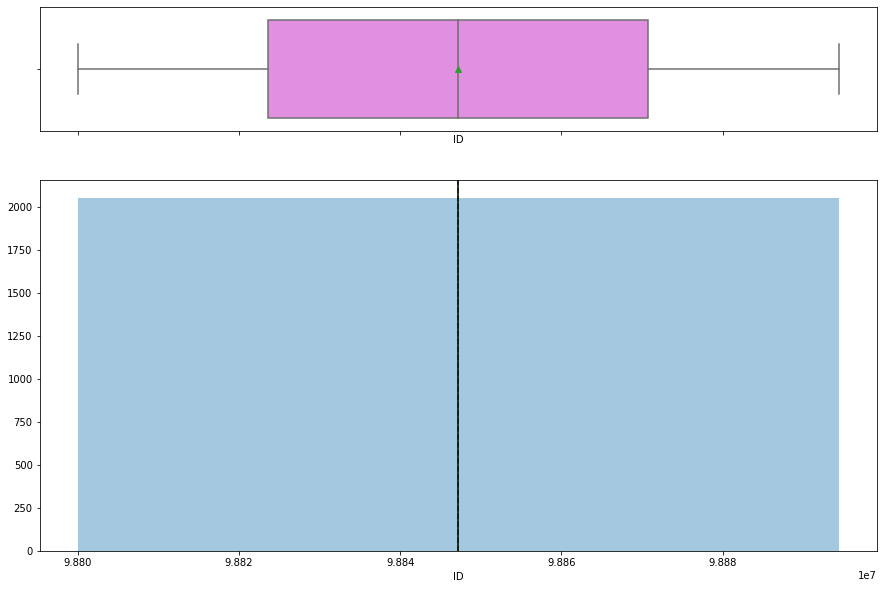

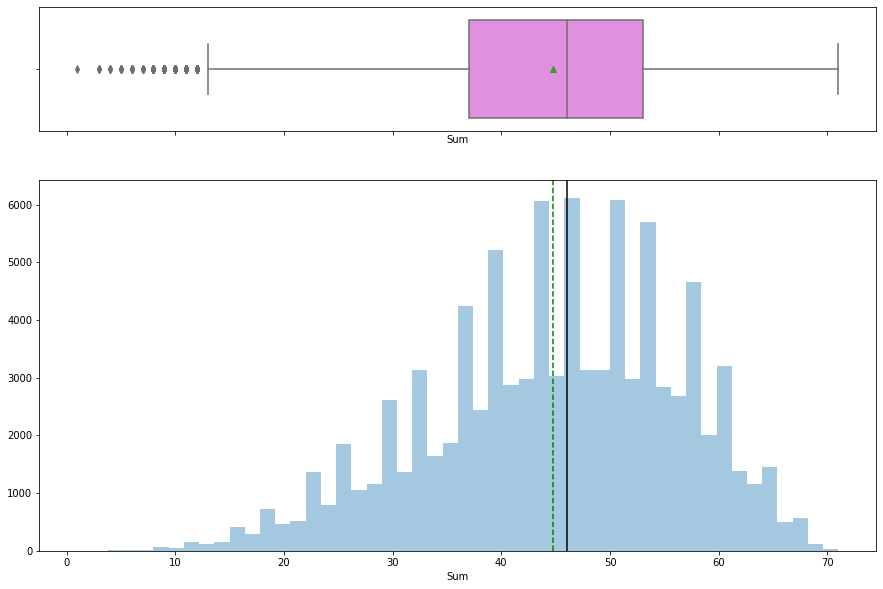

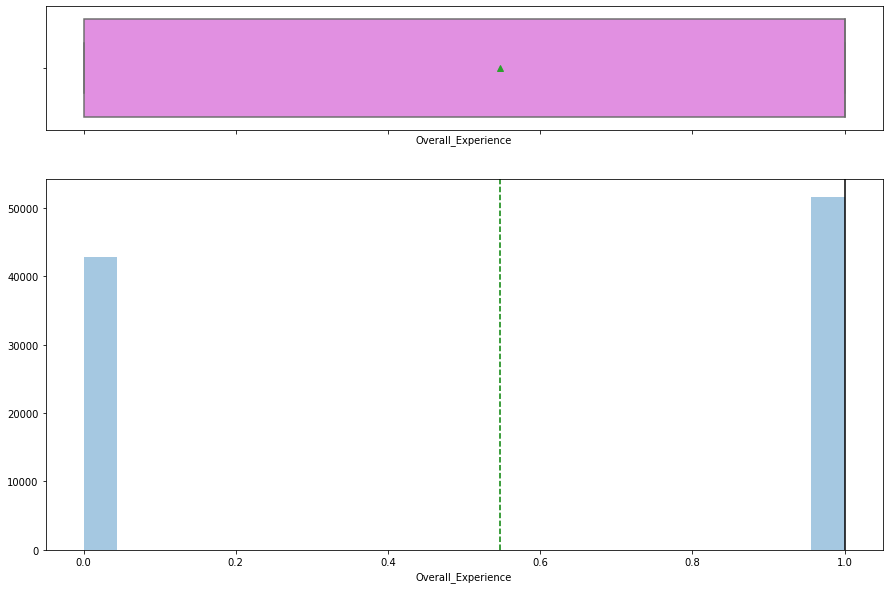

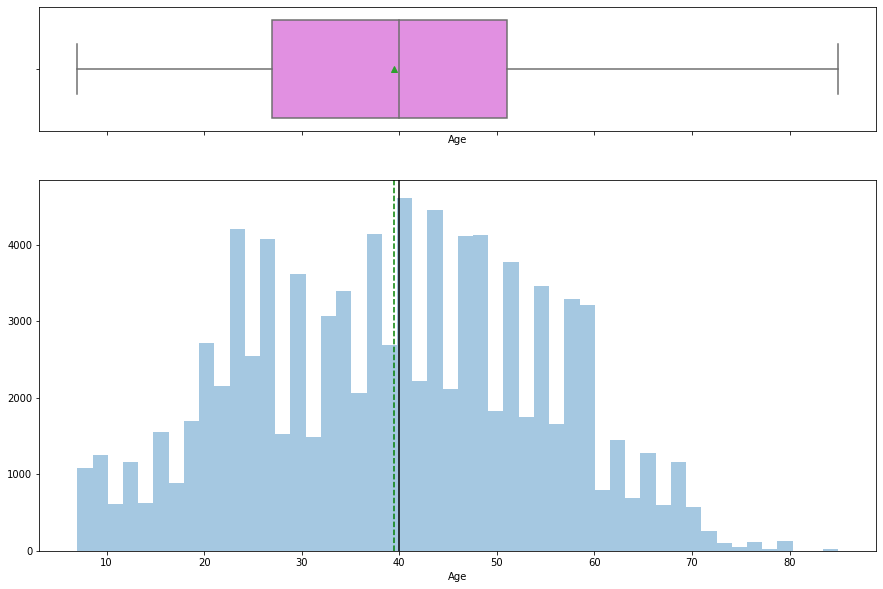

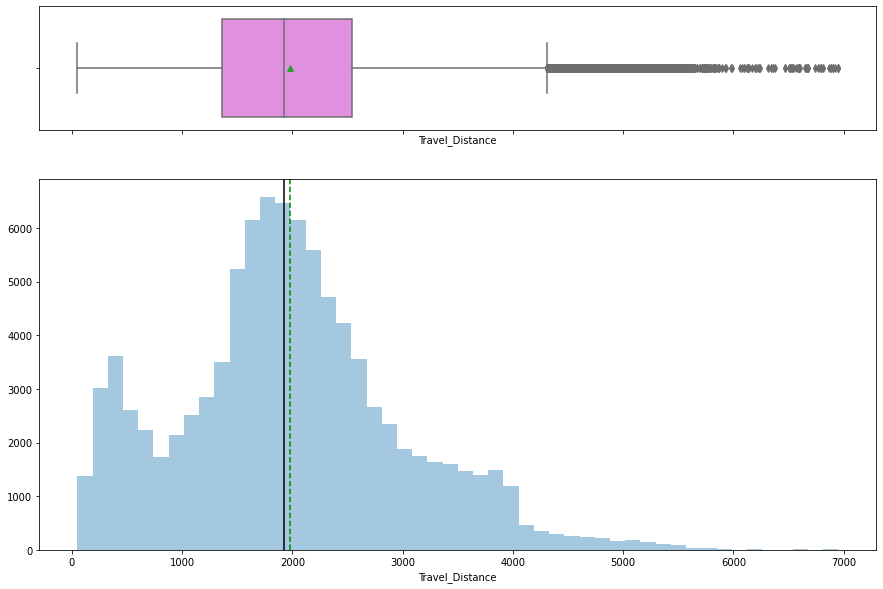

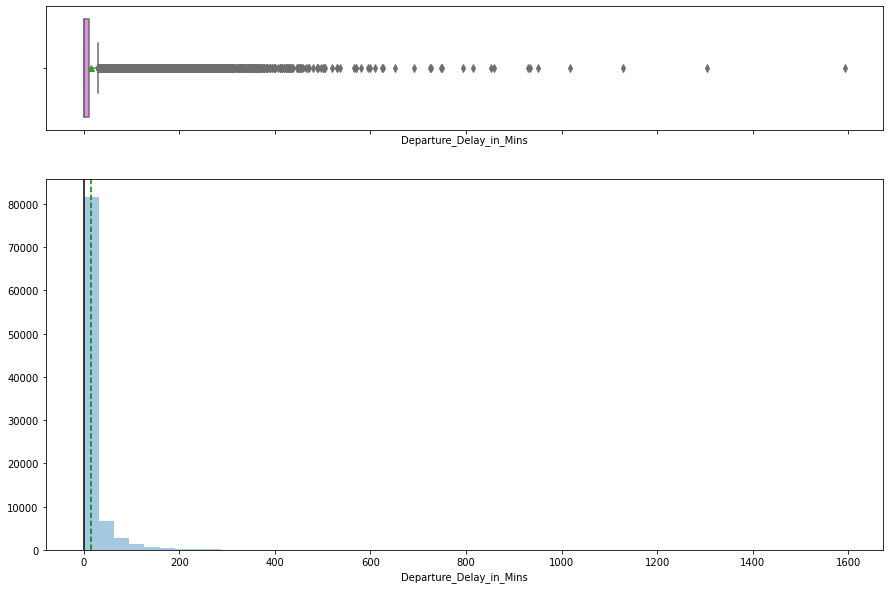

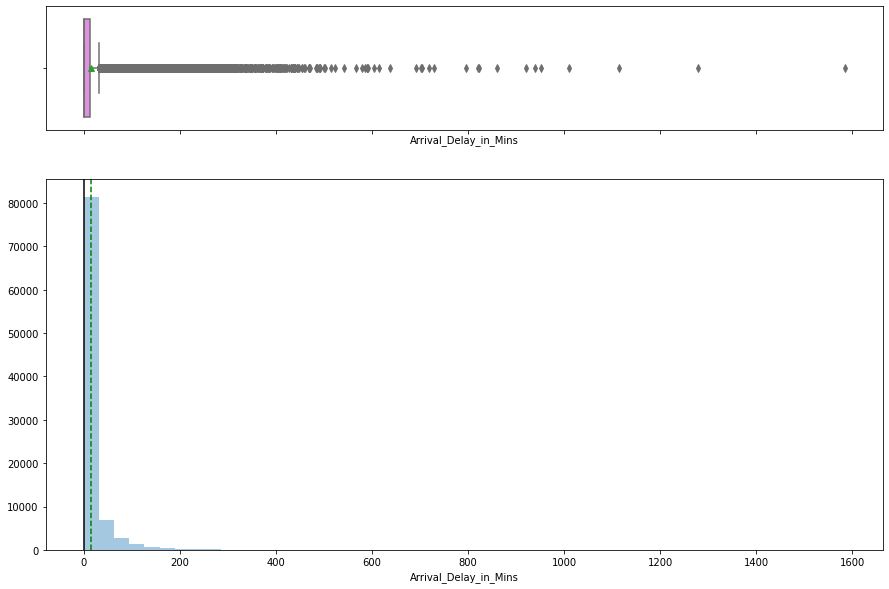

In [41]:
for column in num_cols_train:
    #print("For column:", column)
    histogram_boxplot(final_training_data[column])

In [42]:
print(np.log(final_training_data['Arrival_Delay_in_Mins'] + 1))

0        1.791759
1        0.000000
2        4.787492
3        2.944439
4        0.000000
           ...   
94374    4.836282
94375    2.484907
94376    0.000000
94377    0.000000
94378    3.367296
Name: Arrival_Delay_in_Mins, Length: 94379, dtype: float64


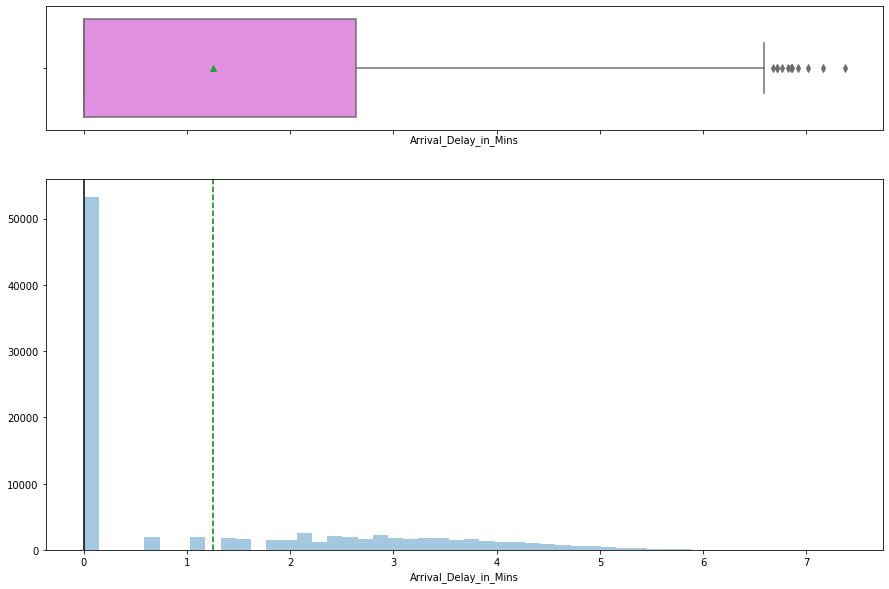

In [43]:
histogram_boxplot(np.log(final_training_data['Arrival_Delay_in_Mins']+1))

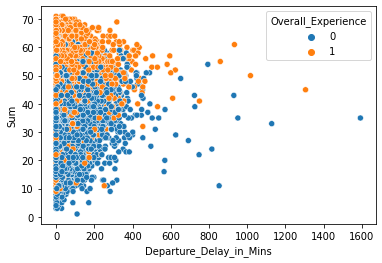

In [44]:
sns.scatterplot(data = final_training_data, x = "Departure_Delay_in_Mins", y = "Sum", hue = "Overall_Experience")

In [45]:
columnar = ['Arrival_Delay_in_Mins','Departure_Delay_in_Mins']
final_training_data['Total Delay'] = final_training_data[columnar].sum(axis=1)

In [46]:
final_training_data

,ID,Sum,Overall_Experience,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Total Delay
0,98800001,32,0,Green Car,Female,52.0,Business Travel,Business,272,0.0,5.0,5.0
1,98800002,39,0,Ordinary,Male,48.0,Personal Travel,Eco,2200,9.0,0.0,9.0
2,98800003,44,1,Green Car,Female,43.0,Business Travel,Business,1061,77.0,119.0,196.0
3,98800004,35,0,Ordinary,Female,44.0,Business Travel,Business,780,13.0,18.0,31.0
4,98800005,50,1,Ordinary,Female,50.0,Business Travel,Business,1981,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,41,0,Ordinary,Male,32.0,Business Travel,Business,1357,83.0,125.0,208.0
94375,98894376,50,1,Ordinary,Male,44.0,Business Travel,Business,592,5.0,11.0,16.0
94376,98894377,40,1,Green Car,Male,63.0,Business Travel,Business,2794,0.0,0.0,0.0
94377,98894378,45,0,Ordinary,Male,16.0,Personal Travel,Eco,2744,0.0,0.0,0.0


In [47]:
final_training_data['Total Delay'].describe()

count    94379.000000
mean        29.586709
std         75.717249
min          0.000000
25%          0.000000
50%          2.000000
75%         24.000000
max       3176.000000
Name: Total Delay, dtype: float64

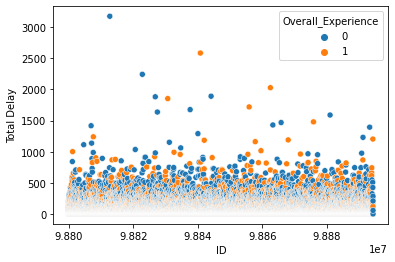

In [48]:
sns.scatterplot(data = final_training_data, x = "ID", y = "Total Delay", hue = "Overall_Experience")

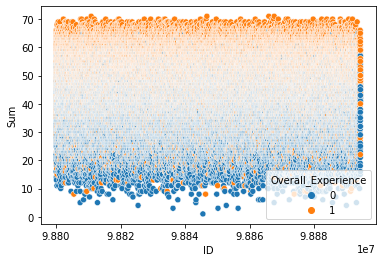

In [49]:
sns.scatterplot(data = final_training_data, x = "ID", y = "Sum", hue = "Overall_Experience")

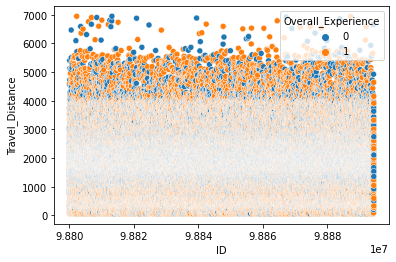

In [50]:
sns.scatterplot(data = final_training_data, x = "ID", y = "Travel_Distance", hue = "Overall_Experience")

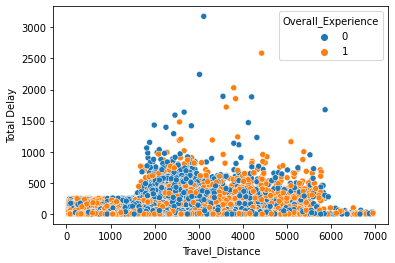

In [51]:
sns.scatterplot(data = final_training_data, x = "Travel_Distance", y = "Total Delay", hue = "Overall_Experience")

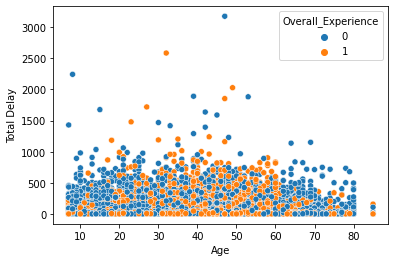

In [52]:
sns.scatterplot(data = final_training_data, x = "Age", y = "Total Delay", hue = "Overall_Experience")

In [53]:
THE_final_training_data = final_training_data.copy(deep = True)

In [54]:
THE_final_training_data = final_training_data.drop(['Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1)

In [55]:
THE_final_training_data

,ID,Sum,Overall_Experience,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Total Delay
0,98800001,32,0,Green Car,Female,52.0,Business Travel,Business,272,5.0
1,98800002,39,0,Ordinary,Male,48.0,Personal Travel,Eco,2200,9.0
2,98800003,44,1,Green Car,Female,43.0,Business Travel,Business,1061,196.0
3,98800004,35,0,Ordinary,Female,44.0,Business Travel,Business,780,31.0
4,98800005,50,1,Ordinary,Female,50.0,Business Travel,Business,1981,0.0
...,...,...,...,...,...,...,...,...,...,...
94374,98894375,41,0,Ordinary,Male,32.0,Business Travel,Business,1357,208.0
94375,98894376,50,1,Ordinary,Male,44.0,Business Travel,Business,592,16.0
94376,98894377,40,1,Green Car,Male,63.0,Business Travel,Business,2794,0.0
94377,98894378,45,0,Ordinary,Male,16.0,Personal Travel,Eco,2744,0.0


In [56]:
from sklearn import manifold, datasets, decomposition

In [57]:
num_THE_final_training_data = THE_final_training_data[['Sum', 'Age','Travel_Distance','Total Delay']]
y = THE_final_training_data['Overall_Experience']


In [58]:
print(y)

0        0
1        0
2        1
3        0
4        1
        ..
94374    0
94375    1
94376    1
94377    0
94378    0
Name: Overall_Experience, Length: 94379, dtype: int64


In [59]:
X_pca = decomposition.PCA(n_components = 2).fit_transform(num_THE_final_training_data)

In [60]:
# Function to create scatter plot

def scatter(X, title = None):
    x1 = []
    
    x2 = []
    
    plt.figure(figsize = (10, 10))
    
    plt.title(title)
    
    for i in X:
        x1.append(i[0])
        
        x2.append(i[1])
    
    sns.scatterplot(x = x1, y = x2)
    
    plt.show()

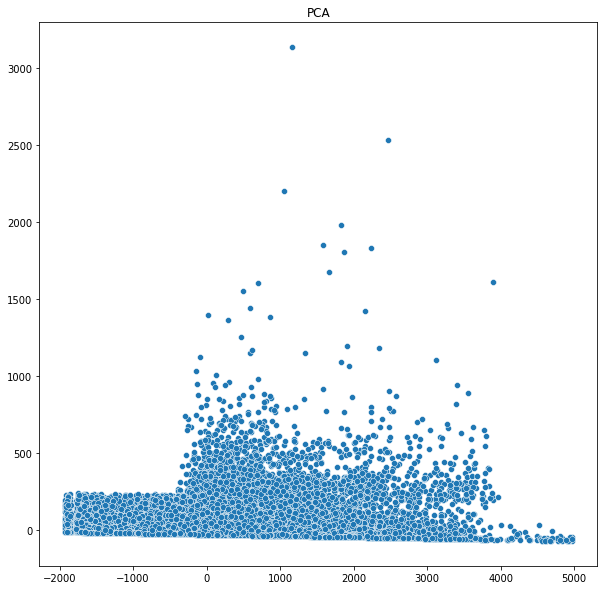

In [61]:
scatter(X_pca, "PCA")

In [62]:
# Scale and visualize the embedding vectors
from matplotlib import offsetbox
def plot_embedding(X, title=None):              # Passing the embedded array and the title of the graph
    
    print(X)                                        
    
    x_min, x_max = np.min(X, 0), np.max(X, 0)   # Finding the max and min of the passed array
    
    X = (X - x_min) / (x_max - x_min)           # Scaling the array, new values are between 0 and 1

    plt.figure(figsize = (12, 12))               # Setting the figure size to a sufficiently large value
    
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]):
        
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 
                 color = plt.cm.Set1(y[i] / 10.),
                 
                 fontdict = {'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        
        plt.title(title)
    
    plt.show()

In [63]:
# Plotting PCA projections
#plot_embedding(X_pca, "Colour PCA")

In [64]:
the_categories = []
for i in copy_test_data:
  if(copy_test_data[i].dtype == 'category'):
    the_categories.append(copy_test_data[i].cat.categories.tolist())
    print(str(i) + " : length - " + str(len(copy_test_data[i].cat.categories.tolist())))

Seat_Comfort : length - 6
Seat_Class : length - 2
Arrival_Time_Convenient : length - 6
Catering : length - 6
Platform_Location : length - 5
Onboard_Wifi_Service : length - 6
Onboard_Entertainment : length - 6
Online_Support : length - 5
Ease_of_Online_Booking : length - 6
Onboard_Service : length - 5
Legroom : length - 6
Baggage_Handling : length - 5
CheckIn_Service : length - 5
Cleanliness : length - 5
Online_Boarding : length - 6
Gender : length - 2
Customer_Type : length - 2
Type_Travel : length - 2
Travel_Class : length - 2


In [65]:
for i in the_categories:
  if(len(i) == 6):
    print(i)

print('-------')

for i in the_categories:
  if(len(i) == 5):
    print(i)

print('-------')

for i in the_categories:
  if(len(i) == 2):
    print(i)

['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Extremely Poor', 'Good', 'Needs Improvement', 'Poor']
-------
['Convenient', 'Inconvenient', 'Manageable', 'Needs Improvement', 'Very Convenient']
['Acceptable', 'Excellent', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Good', 'Needs Improvement', 'Poor']
['Acceptable', 'Excellent', 'Good', 'Needs Impro

In [66]:
copy2_test_data = copy_test_data.copy(deep = True)

In [67]:
copy2_test_data = copy2_test_data.applymap(lambda s: mapping_6po1.get(s) if s in mapping_6po1 else s)

In [68]:
copy2_test_data = copy2_test_data.applymap(lambda t: mapping_6po2.get(t) if t in mapping_6po2 else t)

In [69]:
copy2_test_data = copy2_test_data.applymap(lambda u: mapping_2po1.get(u) if u in mapping_2po1 else u)

In [70]:
columnar = ['Seat_Comfort','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding','Customer_Type']
copy2_test_data['Sum'] = copy2_test_data[columnar].sum(axis=1)

In [71]:
copy2_test_data

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Sum
0,99900001,3,Green Car,3,3,3,0,5,4,5,5,5,5,4,5,2,Female,1,36.0,Business Travel,Business,532,0.0,0.0,53
1,99900002,1,Ordinary,4,2,3,3,2,3,3,5,3,4,3,5,3,Female,0,21.0,Business Travel,Business,1425,9.0,28.0,44
2,99900003,5,Ordinary,5,5,5,5,5,5,0,0,0,0,4,0,5,Male,1,60.0,Business Travel,Business,2832,0.0,0.0,45
3,99900004,3,Green Car,5,3,5,2,3,5,2,3,0,5,5,5,2,Female,1,29.0,Personal Travel,Eco,1352,0.0,0.0,49
4,99900005,5,Ordinary,1,5,0,5,5,5,5,4,3,5,5,5,5,Male,0,18.0,Business Travel,Business,1610,17.0,0.0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,0,Green Car,5,0,3,3,0,3,3,4,5,4,3,4,3,Male,1,8.0,Personal Travel,Eco,1334,0.0,0.0,41
35598,99935599,0,Ordinary,0,4,0,3,5,5,4,4,4,4,3,4,4,Female,1,53.0,Business Travel,Business,1772,0.0,0.0,45
35599,99935600,4,Green Car,1,4,0,0,4,2,0,2,3,2,2,5,0,Male,0,22.0,Business Travel,Eco,1180,0.0,0.0,29
35600,99935601,5,Ordinary,5,5,2,3,5,4,5,5,5,5,3,5,4,Female,1,67.0,Personal Travel,Eco,420,23.0,16.0,62


In [72]:
final_testing_data = copy2_test_data[['ID', 'Sum', 'Seat_Class','Gender','Age','Type_Travel','Travel_Class','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']]

In [73]:
final_testing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Sum,35602.0,4.474142e+01,11.469995,3.0,37.00,46.0,53.00,71.0
Age,35602.0,3.944717e+01,15.135218,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35602.0,1.486857e+01,37.882395,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35602.0,1.525591e+01,38.475161,0.0,0.00,0.0,13.00,970.0


In [74]:
final_testing_data.isnull().sum()

ID                         0
Sum                        0
Seat_Class                 0
Gender                     0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [75]:
columnar = ['Arrival_Delay_in_Mins','Departure_Delay_in_Mins']
final_testing_data['Total Delay'] = final_testing_data[columnar].sum(axis=1)

In [76]:
THE_final_testing_data = final_testing_data.copy(deep = True)

In [77]:
THE_final_testing_data = final_testing_data.drop(['Departure_Delay_in_Mins','Arrival_Delay_in_Mins'], axis = 1)

In [78]:
num_THE_final_testing_data = THE_final_testing_data[['Sum', 'Age','Travel_Distance','Total Delay']]

In [79]:
X_pca_test = decomposition.PCA(n_components = 2).fit_transform(num_THE_final_testing_data)

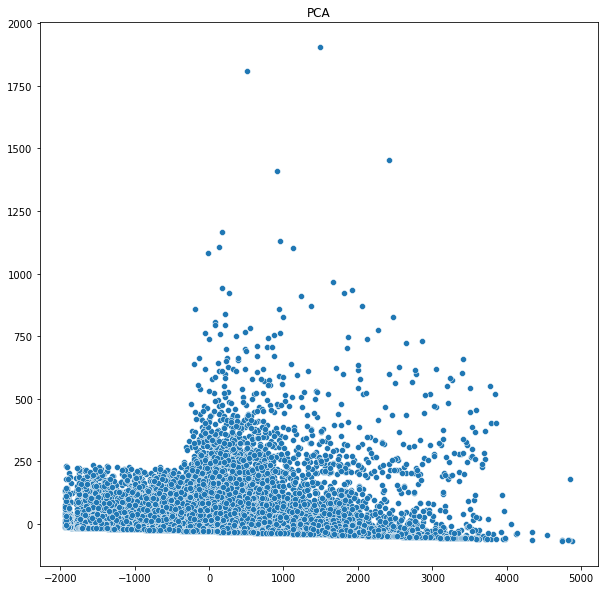

In [80]:
scatter(X_pca_test, "PCA")

In [81]:
THE_final_training_data

,ID,Sum,Overall_Experience,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Total Delay
0,98800001,32,0,Green Car,Female,52.0,Business Travel,Business,272,5.0
1,98800002,39,0,Ordinary,Male,48.0,Personal Travel,Eco,2200,9.0
2,98800003,44,1,Green Car,Female,43.0,Business Travel,Business,1061,196.0
3,98800004,35,0,Ordinary,Female,44.0,Business Travel,Business,780,31.0
4,98800005,50,1,Ordinary,Female,50.0,Business Travel,Business,1981,0.0
...,...,...,...,...,...,...,...,...,...,...
94374,98894375,41,0,Ordinary,Male,32.0,Business Travel,Business,1357,208.0
94375,98894376,50,1,Ordinary,Male,44.0,Business Travel,Business,592,16.0
94376,98894377,40,1,Green Car,Male,63.0,Business Travel,Business,2794,0.0
94377,98894378,45,0,Ordinary,Male,16.0,Personal Travel,Eco,2744,0.0


In [82]:
THE_final_testing_data

,ID,Sum,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Total Delay
0,99900001,53,Green Car,Female,36.0,Business Travel,Business,532,0.0
1,99900002,44,Ordinary,Female,21.0,Business Travel,Business,1425,37.0
2,99900003,45,Ordinary,Male,60.0,Business Travel,Business,2832,0.0
3,99900004,49,Green Car,Female,29.0,Personal Travel,Eco,1352,0.0
4,99900005,58,Ordinary,Male,18.0,Business Travel,Business,1610,17.0
...,...,...,...,...,...,...,...,...,...
35597,99935598,41,Green Car,Male,8.0,Personal Travel,Eco,1334,0.0
35598,99935599,45,Ordinary,Female,53.0,Business Travel,Business,1772,0.0
35599,99935600,29,Green Car,Male,22.0,Business Travel,Eco,1180,0.0
35600,99935601,62,Ordinary,Female,67.0,Personal Travel,Eco,420,39.0


In [83]:
MODEL_FINAL_TRAINING_DATA = THE_final_training_data.drop(['Overall_Experience'],axis=1)

In [84]:
MODEL_FINAL_TRAINING_DATA

,ID,Sum,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Total Delay
0,98800001,32,Green Car,Female,52.0,Business Travel,Business,272,5.0
1,98800002,39,Ordinary,Male,48.0,Personal Travel,Eco,2200,9.0
2,98800003,44,Green Car,Female,43.0,Business Travel,Business,1061,196.0
3,98800004,35,Ordinary,Female,44.0,Business Travel,Business,780,31.0
4,98800005,50,Ordinary,Female,50.0,Business Travel,Business,1981,0.0
...,...,...,...,...,...,...,...,...,...
94374,98894375,41,Ordinary,Male,32.0,Business Travel,Business,1357,208.0
94375,98894376,50,Ordinary,Male,44.0,Business Travel,Business,592,16.0
94376,98894377,40,Green Car,Male,63.0,Business Travel,Business,2794,0.0
94377,98894378,45,Ordinary,Male,16.0,Personal Travel,Eco,2744,0.0


In [85]:
THE_final_training_data

,ID,Sum,Overall_Experience,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Total Delay
0,98800001,32,0,Green Car,Female,52.0,Business Travel,Business,272,5.0
1,98800002,39,0,Ordinary,Male,48.0,Personal Travel,Eco,2200,9.0
2,98800003,44,1,Green Car,Female,43.0,Business Travel,Business,1061,196.0
3,98800004,35,0,Ordinary,Female,44.0,Business Travel,Business,780,31.0
4,98800005,50,1,Ordinary,Female,50.0,Business Travel,Business,1981,0.0
...,...,...,...,...,...,...,...,...,...,...
94374,98894375,41,0,Ordinary,Male,32.0,Business Travel,Business,1357,208.0
94375,98894376,50,1,Ordinary,Male,44.0,Business Travel,Business,592,16.0
94376,98894377,40,1,Green Car,Male,63.0,Business Travel,Business,2794,0.0
94377,98894378,45,0,Ordinary,Male,16.0,Personal Travel,Eco,2744,0.0


In [86]:
TRAINING_LABELS = THE_final_training_data['Overall_Experience']

In [87]:
TRAINING_LABELS

0        0
1        0
2        1
3        0
4        1
        ..
94374    0
94375    1
94376    1
94377    0
94378    0
Name: Overall_Experience, Length: 94379, dtype: int64

In [88]:
TRAINING_LABELS = to_categorical(TRAINING_LABELS, 2)

In [89]:
TRAINING_LABELS

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [90]:
import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras import optimizers

from tensorflow.keras.utils import to_categorical

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split

In [ ]:
backend.clear_session()

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU

In [91]:
[print(i.shape, i.dtype) for i in model5.inputs]
[print(o.shape, o.dtype) for o in model5.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model5.layers]

NameError: ignored

In [92]:
mapping_test1 = {'Green Car':0,
                'Ordinary':1,
                 'Male':2,
                 'Female':3,
                 'Business Travel':4,
                 'Personal Travel':5,
                 'Business':6,
                 'Eco':7
                 }              

In [93]:
MODEL_FINAL_TRAINING_DATA_num = MODEL_FINAL_TRAINING_DATA.applymap(lambda s: mapping_test1.get(s) if s in mapping_test1 else s)

In [94]:
MODEL_FINAL_TRAINING_DATA_num.astype('float32') 
TRAINING_LABELS.astype('float32')
MODEL_FINAL_TRAINING_DATA_num = MODEL_FINAL_TRAINING_DATA_num.drop(['ID'],axis = 1)

In [95]:
MODEL_FINAL_TRAINING_DATA_num

,Sum,Seat_Class,Gender,Age,Type_Travel,Travel_Class,Travel_Distance,Total Delay
0,32,0,3,52.0,4,6,272,5.0
1,39,1,2,48.0,5,7,2200,9.0
2,44,0,3,43.0,4,6,1061,196.0
3,35,1,3,44.0,4,6,780,31.0
4,50,1,3,50.0,4,6,1981,0.0
...,...,...,...,...,...,...,...,...
94374,41,1,2,32.0,4,6,1357,208.0
94375,50,1,2,44.0,4,6,592,16.0
94376,40,0,2,63.0,4,6,2794,0.0
94377,45,1,2,16.0,5,7,2744,0.0


In [96]:
TRAINING_LABELS.shape

(94379, 2)

In [97]:
MODEL_FINAL_TRAINING_DATA_num = MODEL_FINAL_TRAINING_DATA_num.drop(['Travel_Distance','Total Delay'],axis = 1)

In [98]:
MODEL_FINAL_TRAINING_DATA_num

,Sum,Seat_Class,Gender,Age,Type_Travel,Travel_Class
0,32,0,3,52.0,4,6
1,39,1,2,48.0,5,7
2,44,0,3,43.0,4,6
3,35,1,3,44.0,4,6
4,50,1,3,50.0,4,6
...,...,...,...,...,...,...
94374,41,1,2,32.0,4,6
94375,50,1,2,44.0,4,6
94376,40,0,2,63.0,4,6
94377,45,1,2,16.0,5,7


In [99]:
THE_final_testing_data
MODEL_FINAL_TESTING_DATA_num = THE_final_testing_data.applymap(lambda s: mapping_test1.get(s) if s in mapping_test1 else s)
MODEL_FINAL_TESTING_DATA_num = MODEL_FINAL_TESTING_DATA_num.drop(['ID'],axis = 1)

In [100]:
MODEL_FINAL_TESTING_DATA_num = MODEL_FINAL_TESTING_DATA_num.drop(['Travel_Distance','Total Delay'],axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(MODEL_FINAL_TRAINING_DATA_num, TRAINING_LABELS, test_size=0.2, stratify=TRAINING_LABELS, random_state=0)

In [ ]:
model_3 = Sequential()

model_3.add(Dense(128, activation = 'relu', input_shape = (6, )))

model_3.add(Dropout(0.2))

model_3.add(Dense(64, activation = 'relu'))

model_3.add(Dropout(0.1))

model_3.add(Dense(64, activation = 'relu'))

model_3.add(Dropout(0.2))

model_3.add(Dense(128, activation = 'relu'))

model_3.add(Dense(2, activation = 'sigmoid'))

In [ ]:
model_3.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               896       
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 128)              

In [ ]:
history_3 = model_3.fit(MODEL_FINAL_TRAINING_DATA_num, 
                        
                    TRAINING_LABELS,
                    
                    batch_size = 32,

                    validation_split = 0.1,

                    epochs = 20,

                    verbose = 2)

Epoch 1/20
2655/2655 - 8s - loss: 0.5454 - accuracy: 0.7218 - val_loss: 0.5005 - val_accuracy: 0.7521 - 8s/epoch - 3ms/step
Epoch 2/20
2655/2655 - 7s - loss: 0.4982 - accuracy: 0.7561 - val_loss: 0.4877 - val_accuracy: 0.7673 - 7s/epoch - 3ms/step
Epoch 3/20
2655/2655 - 7s - loss: 0.4856 - accuracy: 0.7654 - val_loss: 0.4854 - val_accuracy: 0.7673 - 7s/epoch - 3ms/step
Epoch 4/20
2655/2655 - 8s - loss: 0.4744 - accuracy: 0.7751 - val_loss: 0.4702 - val_accuracy: 0.7763 - 8s/epoch - 3ms/step
Epoch 5/20
2655/2655 - 7s - loss: 0.4644 - accuracy: 0.7842 - val_loss: 0.4454 - val_accuracy: 0.7965 - 7s/epoch - 3ms/step
Epoch 6/20
2655/2655 - 7s - loss: 0.4568 - accuracy: 0.7903 - val_loss: 0.4474 - val_accuracy: 0.7964 - 7s/epoch - 3ms/step
Epoch 7/20
2655/2655 - 9s - loss: 0.4541 - accuracy: 0.7919 - val_loss: 0.4465 - val_accuracy: 0.8038 - 9s/epoch - 3ms/step
Epoch 8/20
2655/2655 - 7s - loss: 0.4510 - accuracy: 0.7942 - val_loss: 0.4375 - val_accuracy: 0.8004 - 7s/epoch - 3ms/step
Epoch 9/

In [ ]:
test_pred = model_3.predict(MODEL_FINAL_TESTING_DATA_num)

1113/1113 [==============================] - 2s 1ms/step


In [ ]:
labels = (test_pred < 0.5).astype(np.int)
print(labels)


[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [1 0]
 [0 1]]


In [ ]:
labels = labels[:,0]

In [ ]:
labels = labels.reshape((len(labels),1))

In [ ]:
labels.shape

(35602, 1)

In [ ]:
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
submission = THE_final_testing_data.ID

In [ ]:
submission.shape

(35602,)

In [ ]:
type(submission)

pandas.core.series.Series

In [ ]:
submission = submission.to_numpy()

In [ ]:
type(submission)

numpy.ndarray

In [ ]:
submission

array([99900001, 99900002, 99900003, ..., 99935600, 99935601, 99935602])

In [ ]:
submission.reshape((len(labels),1))

array([[99900001],
       [99900002],
       [99900003],
       ...,
       [99935600],
       [99935601],
       [99935602]])

In [ ]:
labels.shape

(35602, 1)

In [ ]:
submission.shape

(35602,)

In [2]:
import xgboost as xgb

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [101]:
xgb_cl = xgb.XGBClassifier()

In [104]:
MODEL_FINAL_TRAINING_DATA_num.shape

(94379, 6)

In [116]:
TRAINING_LABELS.shape

(94379, 2)

In [119]:
y_processed = TRAINING_LABELS[:,1]
y_processed = y_processed.reshape(94379,1)
print(y_processed.shape)

(94379, 1)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    MODEL_FINAL_TRAINING_DATA_num, y_processed, stratify=y_processed, random_state=1121218, train_size = 0.8, test_size = 0.2
)

In [126]:
X_processed = MODEL_FINAL_TRAINING_DATA_num

In [121]:

from sklearn.metrics import accuracy_score

In [122]:
xgb_cl.fit(X_train, y_train)

XGBClassifier()

In [123]:
preds = xgb_cl.predict(X_test)


In [124]:
accuracy_score(y_test, preds)

0.8149502013138377

In [125]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [127]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_processed, y_processed)

In [128]:
grid_cv.best_score_

0.8862220970157629

In [130]:
print(grid_cv.best_estimator_)

XGBClassifier(colsample_bytree=0.5, gamma=0.25, max_depth=5, subsample=0.8)


In [131]:
print(grid_cv.best_params_)

{'colsample_bytree': 0.5, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}
